In [0]:
#Importing the MNIST digit dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

6


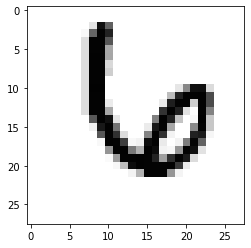

In [0]:
#Checking the contents of the dataset
import matplotlib.pyplot as plt
image_index = 44444   #Any number from 1 to 60,000
print(y_train[image_index]) # The label is 6
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
#Checking the shapes of x and y
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
#Converting the y arrays to a shape of [no. of images, no. of classes]
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

Using TensorFlow backend.


In [0]:
y_train.shape

(60000, 10)

In [0]:
# Reshaping the array to include the RGB value. Here RGB value is 1 since it is a b&w image
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
# Converting the arrays to float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalizing the RGB codes by dividing it to the maximum RGB value.
x_train /= 255
x_test /= 255

In [0]:
#Checking the shapes of x_train and y_train 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#Initializing the input shape
input_shape = (28, 28, 1)

In [0]:
#Building the "Convolutional Neural Network" model

from tensorflow import keras

model = keras.Sequential([

keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Flatten(),
keras.layers.Dropout(0.4),
keras.layers.Dense(10, activation='softmax')

])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
batch_normalization_6 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 32)         

In [0]:
#Training the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x=x_train,y=y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 24s 394us/sample - loss: 0.2895 - acc: 0.9166
Epoch 2/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0979 - acc: 0.9732
Epoch 3/30
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0795 - acc: 0.9786
Epoch 4/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0623 - acc: 0.9837
Epoch 5/30
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0561 - acc: 0.9852
Epoch 6/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0513 - acc: 0.9862
Epoch 7/30
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0457 - acc: 0.9876
Epoch 8/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0398 - acc: 0.9893
Epoch 9/30
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0389 - acc: 0.9896
Epoch 10/30
60000/60000 [================

In [0]:
#Testing the model
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.022187940784000604, 0.9952]

In [0]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/models')